In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load Data Set

In [2]:
## To label the data and provide the path for data into file
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')


Dataset is Loaded


In [3]:
## Demo the data and show it in the result
len(paths)

2800

In [4]:
## example the sample data for path
paths[:5]

['TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
## example the sample data for label
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS Toronto emotional speech set data\OAF_ang...,angry
1,TESS Toronto emotional speech set data\OAF_ang...,angry
2,TESS Toronto emotional speech set data\OAF_ang...,angry
3,TESS Toronto emotional speech set data\OAF_ang...,angry
4,TESS Toronto emotional speech set data\OAF_ang...,angry


In [7]:
## differeniate the label as name and datatype 
df['label'].value_counts()

fear       400
angry      400
neutral    400
sad        400
disgust    400
ps         400
happy      400
Name: label, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

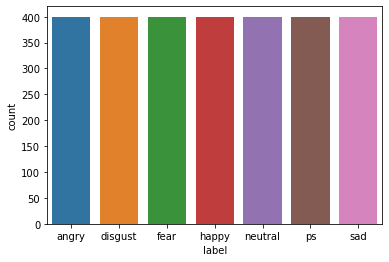

In [8]:
sns.countplot(df['label'])

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

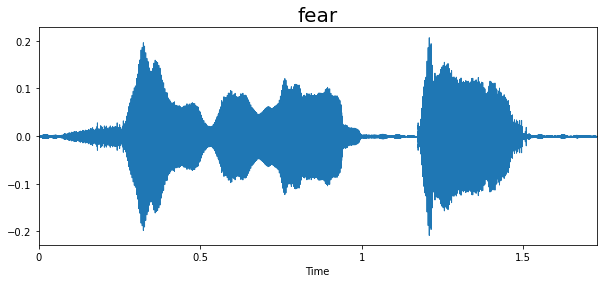

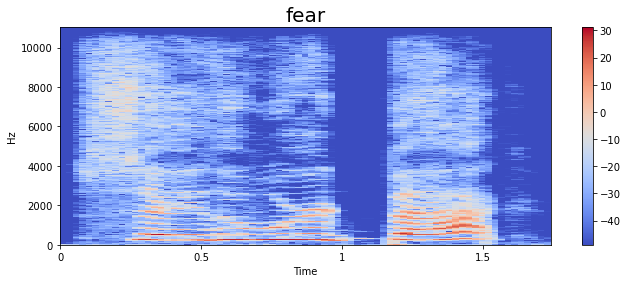

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

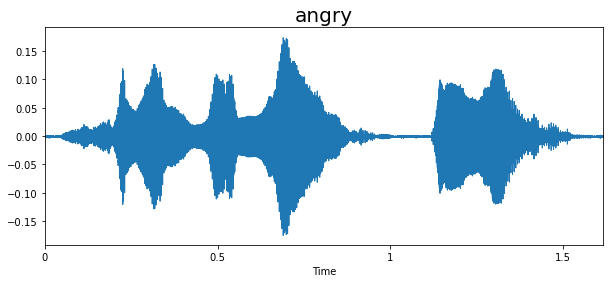

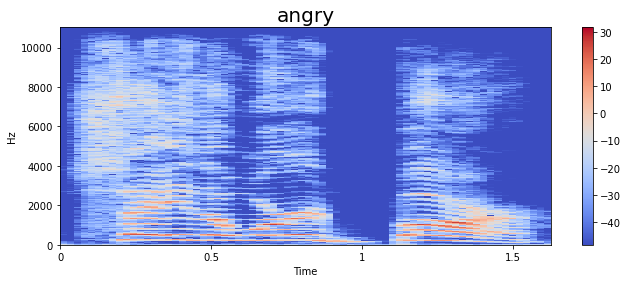

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

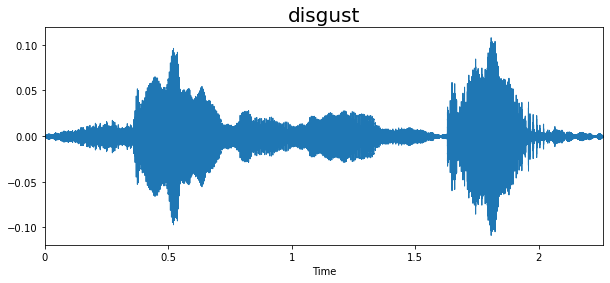

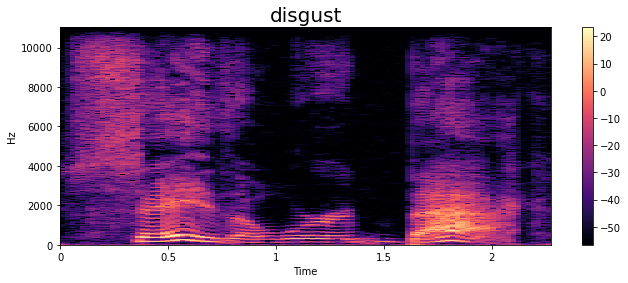

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

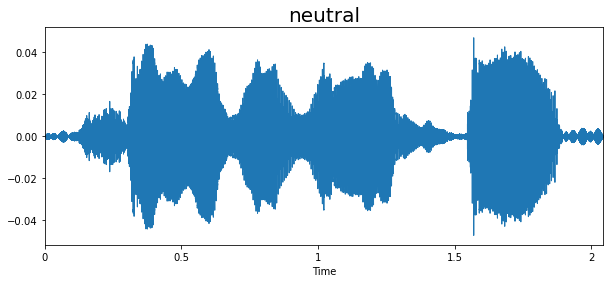

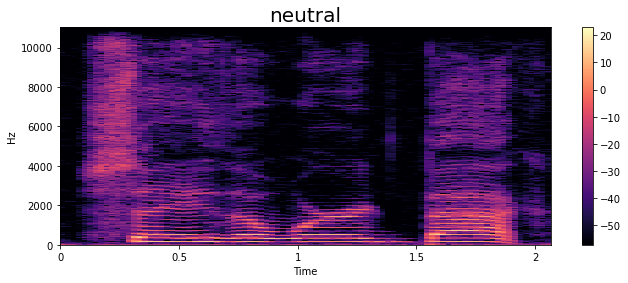

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

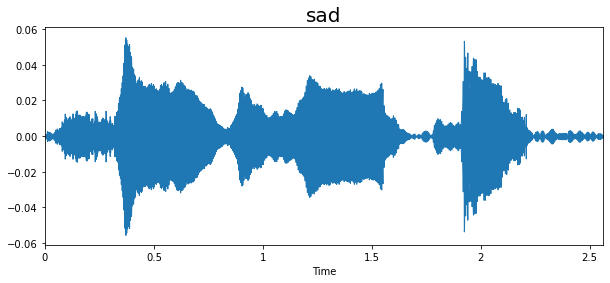

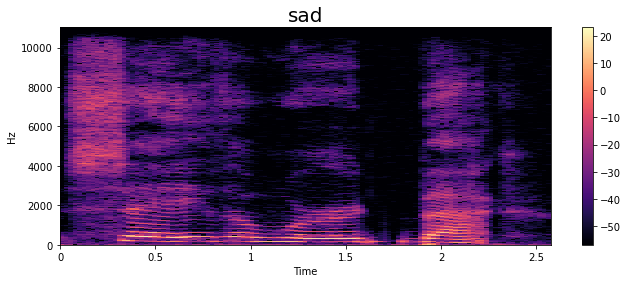

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

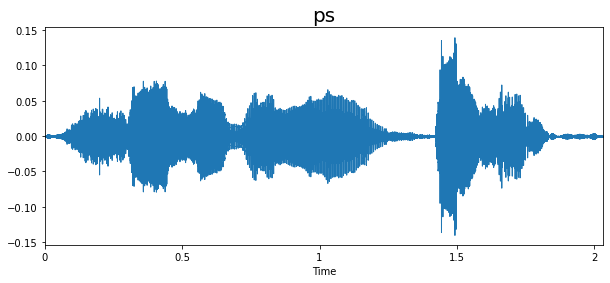

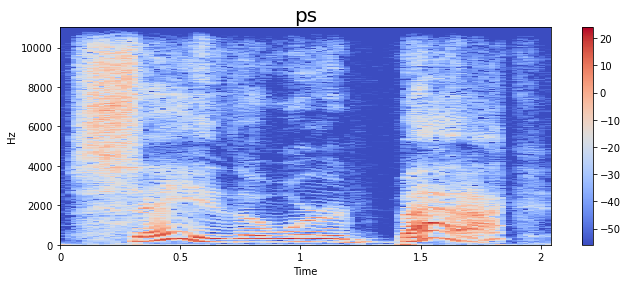

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

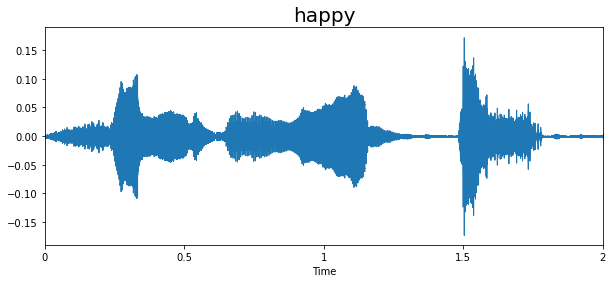

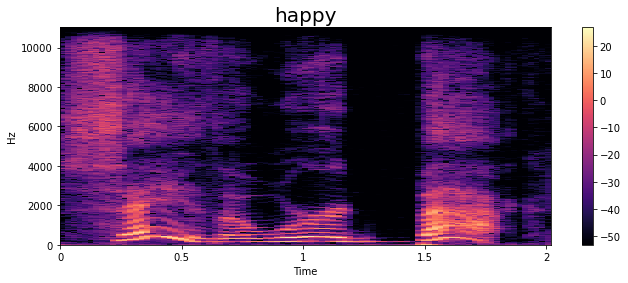

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extration

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-3.9660403e+02,  7.8255562e+01, -1.9569336e+01, -2.1489851e+01,
       -2.5252988e+00,  1.0445655e+01, -2.1044718e+01, -5.8948498e+00,
       -7.4592462e+00, -5.2469361e-01, -2.1899052e+00,  5.1469737e-01,
        5.5106121e-01,  1.1669712e+00,  2.6338913e+00,  3.3791063e+00,
       -4.8432755e+00, -4.3863816e+00, -1.8235217e+00, -1.0080046e+01,
       -7.6946750e+00, -1.4722952e+00, -7.2105827e+00,  9.8874454e+00,
        8.1233654e+00,  2.1820002e+01,  1.9096575e+01,  2.0362583e+01,
        1.2816748e+01,  8.4005709e+00,  2.0429327e-01,  5.1074352e+00,
        9.3775539e+00,  5.3786025e+00,  2.4897265e+00, -1.6286910e+00,
        4.7148480e+00,  9.0847263e+00,  2.0382314e+00, -1.8096157e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-396.60403, 78.25556, -19.569336, -21.489851,...
1       [-464.3027, 99.71149, 0.49535513, -32.290123, ...
2       [-431.25235, 46.400932, 1.1367949, 0.10756365,...
3       [-403.49228, 76.6456, -13.560001, -21.845512, ...
4       [-436.31775, 79.59582, 11.8599205, 16.000425, ...
                              ...                        
2795    [-551.4317, 89.09242, 27.236897, 16.822832, 19...
2796    [-588.8842, 96.746254, 36.89093, 15.532428, 28...
2797    [-534.2923, 86.355705, 27.474577, 19.99608, 22...
2798    [-549.6501, 110.40657, 31.674332, 13.175067, 2...
2799    [-549.86005, 102.803154, 32.03378, 27.309933, ...
Name: speech, Length: 2800, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(2800, 7)

## Create the LSTM model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77,127
Trainable params: 77,127
Non-traina

In [27]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=256)

Epoch 1/50
9/9 [==============================] - 2s 133ms/step - loss: 1.9231 - accuracy: 0.2496 - val_loss: 1.9777 - val_accuracy: 0.0018
Epoch 2/50
9/9 [==============================] - 1s 74ms/step - loss: 1.6355 - accuracy: 0.3964 - val_loss: 1.9455 - val_accuracy: 0.1000
Epoch 3/50
9/9 [==============================] - 1s 75ms/step - loss: 1.3448 - accuracy: 0.5094 - val_loss: 1.7946 - val_accuracy: 0.2857
Epoch 4/50
9/9 [==============================] - 1s 75ms/step - loss: 1.1595 - accuracy: 0.5853 - val_loss: 1.6302 - val_accuracy: 0.2857
Epoch 5/50
9/9 [==============================] - 1s 74ms/step - loss: 0.9986 - accuracy: 0.6438 - val_loss: 1.4910 - val_accuracy: 0.2857
Epoch 6/50
9/9 [==============================] - 1s 77ms/step - loss: 0.8614 - accuracy: 0.7036 - val_loss: 1.4052 - val_accuracy: 0.2857
Epoch 7/50
9/9 [==============================] - 1s 72ms/step - loss: 0.7162 - accuracy: 0.7451 - val_loss: 1.1821 - val_accuracy: 0.3411
Epoch 8/50
9/9 [==========

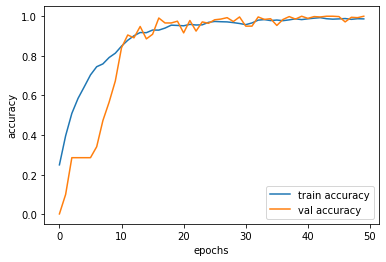

In [28]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

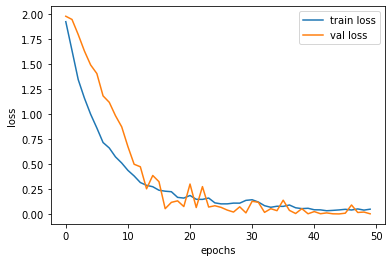

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()